In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
import pandas as pd
import numpy as np
from influxdb import *

INFLUX_DB_IP = '10.12.97.178'
INFLUX_DB_PORT = 8086
INFLUX_DB = 'demoDb'
READ_MEASUREMENT = 'EM_main'
LIVE_MEASUREMENT = 'EM_live'
TAG_MEASUREMENT = 'EM_main_test'

con_obj = InfluxDBClient(host=INFLUX_DB_IP, port=INFLUX_DB_PORT, database=INFLUX_DB)
query = 'select * from ' + str(TAG_MEASUREMENT) + ' where EM_id = \'4\' and time > now() - 1d '
df = pd.DataFrame(con_obj.query(query, chunked=True, chunk_size=10000).get_points())
df.head()


In [19]:
# df=pd.read_excel(r"C:\Users\u22v09\desktop\book1.xlsx")

# df.head()

,time,EM_Current Avg (A),EM_Current Ph1 (A),EM_Voltage Ph1-N (V),mean_voltage,EM_id
0,1588394724826769920,0.0,0.0,0.0,0.000000,1.0
1,1588394724904900096,1.5,4.7,230.1,231.266667,4.0
2,1588394725248640000,15.7,26.9,231.1,231.333333,5.0
3,1588394725264270080,0.0,0.0,231.1,231.200000,11.0
4,1588394725436140032,0.0,0.0,231.1,231.200000,7.0


In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['Date'], df['Time'] = df['time'].dt.normalize(), df['time'].dt.time
df=df[df['EM_id']==1]
dff=df
df['just_date'] = df['time'].dt.date


In [21]:
#df.groupby('Date')['EM_Voltage Ph1-N (V)'].describe()

In [22]:
df=df[(df['time'] > '2020-05-02 00:00:00.000000000') & (df['time'] < '2020-05-03 00:00:00.000000000')]

In [23]:

df0=df[(df['EM_Voltage Ph1-N (V)'] == 0)]
df=df[(df['EM_Voltage Ph1-N (V)'] > 0)]

In [24]:
df3=df[(df['EM_Voltage Ph1-N (V)'] == df['EM_Voltage Ph1-N (V)'].min())]
df3.head()




,time,EM_Current Avg (A),EM_Current Ph1 (A),EM_Voltage Ph1-N (V),mean_voltage,EM_id,Date,Time,just_date
84562,2020-05-02 16:56:29.581250048,208.4,211.9,240.0,240.633333,1.0,2020-05-02,16:56:29.581250,2020-05-02
84570,2020-05-02 16:56:33.633580032,207.8,208.9,240.0,240.633333,1.0,2020-05-02,16:56:33.633580,2020-05-02
84582,2020-05-02 16:56:40.081910016,209.2,210.9,240.0,240.633333,1.0,2020-05-02,16:56:40.081910,2020-05-02
84585,2020-05-02 16:56:42.087520000,209.6,210.9,240.0,240.633333,1.0,2020-05-02,16:56:42.087520,2020-05-02
84589,2020-05-02 16:56:44.264430080,204.2,208.9,240.0,240.633333,1.0,2020-05-02,16:56:44.264430,2020-05-02


In [47]:
duration=df0.groupby(df0.index.to_series().diff().ne(1).cumsum())['time'].agg(lambda x: abs((x.iloc[-1] - x.iloc[0]).total_seconds()))
duration 

1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
10248    0.0
10249    0.0
10250    0.0
10251    0.0
10252    0.0
Name: time, Length: 10252, dtype: float64

In [48]:
df['voltage_difference']=df['EM_Voltage Ph1-N (V)'].diff(-1)
df.head()

,time,EM_Current Avg (A),EM_Current Ph1 (A),EM_Voltage Ph1-N (V),mean_voltage,EM_id,Date,Time,just_date,voltage_difference
44343,2020-05-02 11:07:50.225019904,0.0,0.0,254.9,254.033333,1.0,2020-05-02,11:07:50.225019,2020-05-02,0.0
44348,2020-05-02 11:07:52.239709952,0.0,0.0,254.9,254.033333,1.0,2020-05-02,11:07:52.239709,2020-05-02,0.0
44351,2020-05-02 11:07:54.254710016,0.0,0.0,254.9,254.000000,1.0,2020-05-02,11:07:54.254710,2020-05-02,0.0
44355,2020-05-02 11:07:56.287920128,0.0,0.0,254.9,254.000000,1.0,2020-05-02,11:07:56.287920,2020-05-02,0.1
44359,2020-05-02 11:07:58.662129920,0.0,0.0,254.8,253.966667,1.0,2020-05-02,11:07:58.662129,2020-05-02,0.0


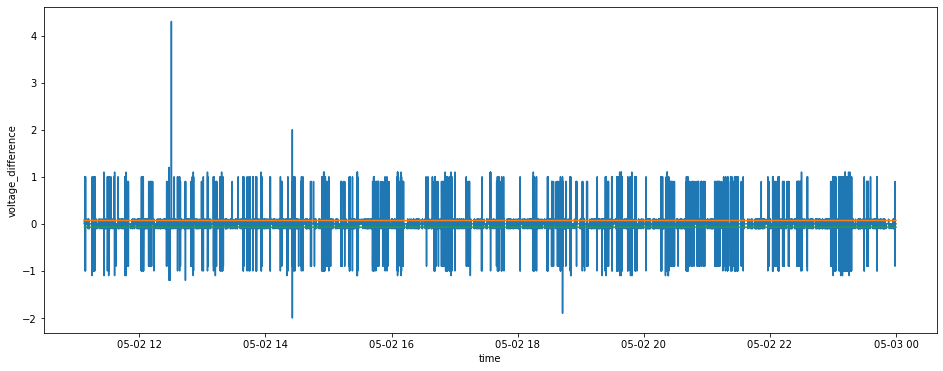

In [60]:
plt.figure(figsize=(16, 6)) 
 
# Plot the responses for different events and regions
sns.lineplot(x="time", y="voltage_difference",
             data=df)
sns.lineplot(x="time", y=abs(df["voltage_difference"]).mean()*1.1,
             data=df)
sns.lineplot(x="time", y=-abs(df["voltage_difference"]).mean()*1.1,
             data=df)

In [52]:

df1['flag']=np.where((df1['EM_Voltage Ph1-N (V)'] > 245) | (df1['EM_Voltage Ph1-N (V)'] < 190),1,0)

In [70]:
df['jumps_instantaneous']= np.where(abs(df["voltage_difference"])> ((abs(df["voltage_difference"]).mean())*1.1),1,0)


,time,EM_Current Avg (A),EM_Current Ph1 (A),EM_Voltage Ph1-N (V),mean_voltage,EM_id,Date,Time,just_date,voltage_difference,delta_volt,jumps,jumps_instantaneous
44343,2020-05-02 11:07:50.225019904,0.0,0.0,254.9,254.033333,1.0,2020-05-02,11:07:50.225019,2020-05-02,0.0,7.019614,0,0
44348,2020-05-02 11:07:52.239709952,0.0,0.0,254.9,254.033333,1.0,2020-05-02,11:07:52.239709,2020-05-02,0.0,7.019614,0,0
44351,2020-05-02 11:07:54.254710016,0.0,0.0,254.9,254.000000,1.0,2020-05-02,11:07:54.254710,2020-05-02,0.0,7.019614,0,0
44355,2020-05-02 11:07:56.287920128,0.0,0.0,254.9,254.000000,1.0,2020-05-02,11:07:56.287920,2020-05-02,0.1,7.019614,1,1
44359,2020-05-02 11:07:58.662129920,0.0,0.0,254.8,253.966667,1.0,2020-05-02,11:07:58.662129,2020-05-02,0.0,6.919614,0,0
44364,2020-05-02 11:08:00.731300096,0.0,0.0,254.8,253.966667,1.0,2020-05-02,11:08:00.731300,2020-05-02,0.0,6.919614,0,0
44368,2020-05-02 11:08:02.764160000,0.0,0.0,254.8,253.966667,1.0,2020-05-02,11:08:02.764160,2020-05-02,0.0,6.919614,0,0
44372,2020-05-02 11:08:04.793570048,0.0,0.0,254.8,253.900000,1.0,2020-05-02,11:08:04.793570,2020-05-02,0.0,6.919614,0,0
44375,2020-05-02 11:08:06.809169920,0.0,0.0,254.8,253.933333,1.0,2020-05-02,11:08:06.809169,2020-05-02,0.0,6.919614,0,0
44383,2020-05-02 11:08:10.468720128,0.0,0.0,254.8,253.966667,1.0,2020-05-02,11:08:10.468720,2020-05-02,0.0,6.919614,0,0


In [72]:
len(df[df['jumps_instantaneous']==1])

3346

In [67]:
abs(df["voltage_difference"]).mean()*1.1

0.06994871794871808

In [49]:
df['delta_volt'] = df['EM_Voltage Ph1-N (V)']-df['EM_Voltage Ph1-N (V)'].mean()

In [50]:
df1=df[(df['time'] > '2020-05-03 00:00:00.000000000') & (df['time'] < '2020-05-04 00:00:00.000000000')]

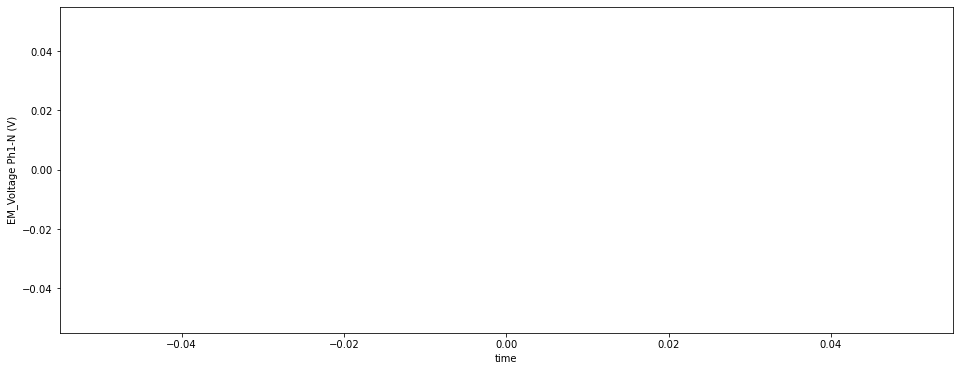

In [51]:
plt.figure(figsize=(16, 6)) 
 
# Plot the responses for different events and regions
sns.lineplot(x="time", y="EM_Voltage Ph1-N (V)",
             data=df1)
sns.lineplot(x="time", y=245,
             data=df1)
sns.lineplot(x="time", y=190,
             data=df1)

In [52]:

df1['flag']=np.where((df1['EM_Voltage Ph1-N (V)'] > 245) | (df1['EM_Voltage Ph1-N (V)'] < 190),1,0)

In [53]:

df1.flag.unique()

array([], dtype=int32)

In [54]:
def set_val(row):
    if row['EM_Voltage Ph1-N (V)'] > 245 :
        return "high"
    elif row['EM_Voltage Ph1-N (V)'] < 190 :
        return "low"
    else:
        return "medium"
    
df1 = df1.assign(flag2=df.apply(set_val, axis=1))
df1.flag2.unique()

array(['high', 'medium'], dtype=object)

In [55]:
dff=dff[(dff['time'] > '2020-05-03 00:00:00.000000000') & (dff['time'] < '2020-05-04 00:00:00.000000000')]
dff = dff.assign(flag2=dff.apply(set_val, axis=1))
dff.flag2.unique()

array(['high', 'medium', 'low'], dtype=object)

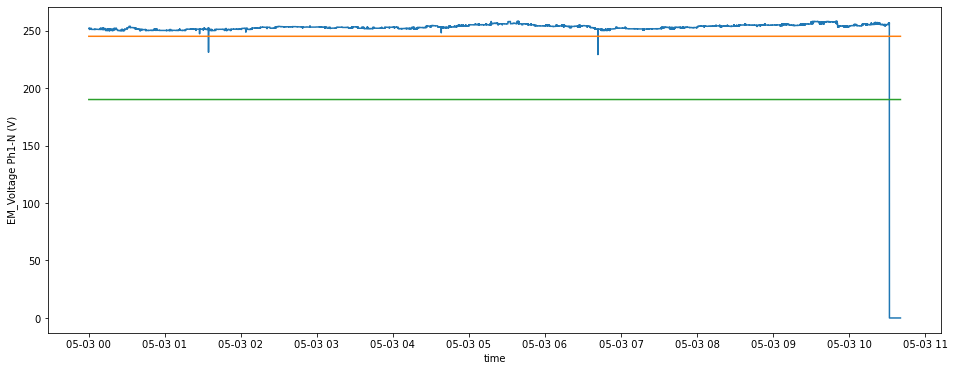

In [56]:
plt.figure(figsize=(16, 6)) 
 
# Plot the responses for different events and regions
sns.lineplot(x="time", y="EM_Voltage Ph1-N (V)",
             data=dff)
sns.lineplot(x="time", y=245,
             data=dff)
sns.lineplot(x="time", y=190,
             data=dff)

In [30]:
x=pd.DataFrame(dff.groupby([(dff.flag2 != dff.flag2.shift()).cumsum()])['time'].apply(lambda x:(x.iloc[-1]-x.iloc[0]).total_seconds()/60))
x['flag2']=dff.loc[dff.flag2.shift(-1) != dff.flag2]['flag2'].values
x.reset_index(drop=True,inplace=True)
x 

,time,flag2
0,94.429066,high
1,0.000000,medium
2,307.204529,high
3,0.000000,medium
4,229.910937,high
5,8.735390,low


In [40]:
len(x[x['flag2']=="high"])

3

In [ ]:
x=pd.DataFrame(df1.groupby([(df1.flag != df1.flag.shift()).cumsum()])['time'].apply(lambda x:(x.iloc[-1]-x.iloc[0]).total_seconds()/60))
x['flag']=df1.loc[df1.flag.shift(-1) != df1.flag]['flag'].values
x.reset_index(drop=True,inplace=True)
x 

In [ ]:
x[x['flag']==1].time.sum()

In [ ]:
x[x['flag']==0].time.sum()

In [ ]:
df1['EM_Voltage Ph1-N (V)'].mean()

In [ ]:
duration1=dff.groupby(dff.index.to_series().diff().ne(1).cumsum())['time'].agg(lambda x: abs((x.iloc[-1] - x.iloc[0]).total_seconds()))
duration1

In [ ]:
plt.figure(figsize=(16, 6)) 
 
# Plot the responses for different events and regions
sns.lineplot(x="time", y="voltage_difference",
             data=df)
sns.lineplot(x="time", y=(abs(df['voltage_difference']).mean())*1.1,
             data=df)
sns.lineplot(x="time", y=-(abs(df['voltage_difference']).mean())*1.1,
             data=df)